## Завдання.
Створіть свій датасет на основі випадкових даних за допомогою numpy.linspace, та проведіть на ньому лінійну регресію, використовуючи інструменти tensorflow.


In [107]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.compat.v1 as tfc

In [93]:
# Generating random linear data
x = np.linspace(0, 50, 100)
y = np.linspace(0, 50, 100)
 
# Adding noise to the random linear data
x += np.random.uniform(-10, 10, 100)
y += np.random.uniform(-10, 10, 100)

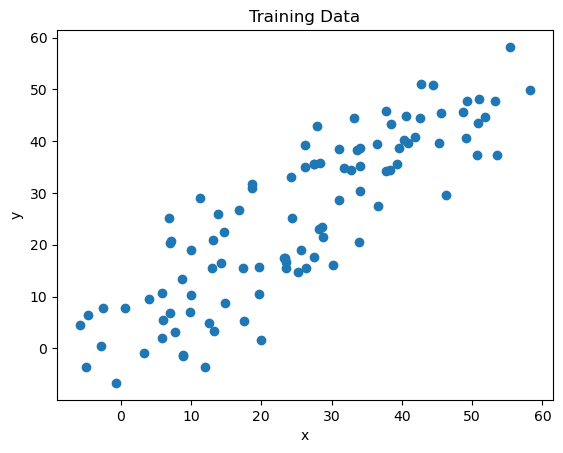

In [94]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()

In [95]:
tfc.disable_eager_execution()

In [96]:
X = tfc.placeholder("float")
Y = tfc.placeholder("float")
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

In [97]:
learning_rate = 0.01
training_epochs = 1000

In [98]:
# Hypothesis
y_pred = tf.add(tf.multiply(X, W), b)
 
# MSE cost function
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * len(x))
 
# Gradient Descent Optimizer
optimizer_gradient = tfc.train.GradientDescentOptimizer(learning_rate).minimize(cost)
 
# Global variables
init = tfc.global_variables_initializer()

In [99]:
# Starting the Tensorflow Session
with tfc.Session() as sess:
     
    # Initializing the Variables
    sess.run(init)
     
    # Iterating through all the epochs
    for epoch in range(training_epochs):
         
        # Feeding each data point into the optimizer using Feed Dictionary
        for (_x, _y) in zip(x, y):
            sess.run(optimizer_gradient, feed_dict = {X : _x, Y : _y})
         
        # Displaying the result after every 50 epochs
        if (epoch + 1) % 50 == 0:
            # Calculating the cost a every epoch
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
     
    # Storing necessary values to be used outside the Session
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch 50 : cost = 35.17956 W = 0.9642336 b = -0.8195213
Epoch 100 : cost = 34.322105 W = 0.9502818 b = -0.11048555
Epoch 150 : cost = 33.71165 W = 0.9379682 b = 0.51529396
Epoch 200 : cost = 33.28687 W = 0.9271006 b = 1.0675896
Epoch 250 : cost = 33.00075 W = 0.917509 b = 1.5550358
Epoch 300 : cost = 32.817387 W = 0.9090437 b = 1.9852413
Epoch 350 : cost = 32.709427 W = 0.9015725 b = 2.364935
Epoch 400 : cost = 32.656097 W = 0.89497864 b = 2.7000325
Epoch 450 : cost = 32.641724 W = 0.88915896 b = 2.9957888
Epoch 500 : cost = 32.654495 W = 0.88402265 b = 3.2568233
Epoch 550 : cost = 32.6856 W = 0.87948954 b = 3.4871974
Epoch 600 : cost = 32.7285 W = 0.87548864 b = 3.6905246
Epoch 650 : cost = 32.778393 W = 0.8719574 b = 3.8699768
Epoch 700 : cost = 32.831802 W = 0.868841 b = 4.028357
Epoch 750 : cost = 32.886234 W = 0.8660908 b = 4.168121
Epoch 800 : cost = 32.939964 W = 0.86366343 b = 4.29148
Epoch 850 : cost = 32.991837 W = 0.86152023 b = 4.400399
Epoch 900 : cost = 33.041065 W = 0.85

In [100]:
predictions = weight * x + bias
print("Training cost =", 
      training_cost, 
      "Weight =", weight, 
      "bias =", bias, '\n')

Training cost = 33.12999 Weight = 0.85648733 bias = 4.656174 



In [101]:
predictions[:10]

array([ 9.75043085, -0.37557356,  4.12013477,  5.17471513,  2.46206372,
        0.37498524, 12.21764786, 14.90092892, 16.04203501,  0.65442323])

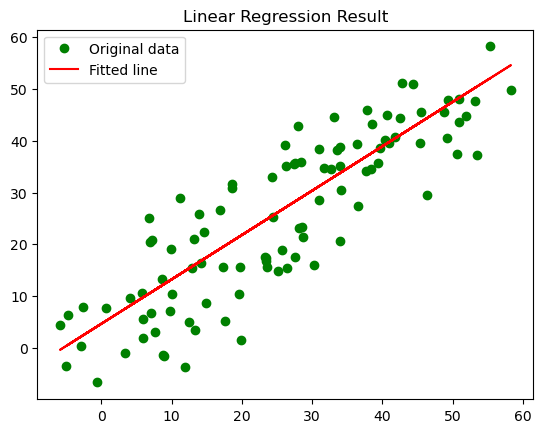

In [106]:
plt.plot(x, y, 'go', label ='Original data')
plt.plot(x, predictions, label ='Fitted line', c='r')
plt.title('Linear Regression Result')
plt.legend()
plt.show()

In [103]:
mae = np.mean(np.abs(y - predictions))
mse = np.square(np.subtract(y,predictions)).mean()
rmse = mse**0.5
r2 = 1-(mse/np.var(y))

In [104]:
print(f'MAE : {mae:.2f}')
print(f'MSE : {mse:.2f}')
print(f'RMSE : {rmse:.2f}')
print(f'R^2 : {r2:.2f}')

MAE : 6.80
MSE : 66.26
RMSE : 8.14
R^2 : 0.74
